# Books vs Movies

In [1]:
import pandas as pd 
import numpy as np
import requests
import pymongo
from config import omdb_key
from pprint import pprint
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
books = pd.read_csv("../../br.csv/br.csv", encoding="utf-8", engine="python", error_bad_lines=False)

Skipping line 312075: unexpected end of data


In [3]:
more_reviews = books.drop(books[books.ratingsCount < 100000].index)

In [4]:
more_reviews['title'].nunique()

3413

In [5]:
sample = more_reviews.iloc[0:2000]
sample = sample.reset_index()
book_rating = sample[['rating']]


In [6]:
books = []

for index, row in sample.iterrows():
    title = row['title']
    books.append(title)
    

In [7]:
base_url = "http://www.omdbapi.com/?" 

query_url = f"{base_url}apikey=trilogy&t={books[0]}"

response = requests.get(query_url)

pprint(response.json())

{'Actors': 'Richard Harris, Maggie Smith, Robbie Coltrane, Saunders Triplets',
 'Awards': 'Nominated for 3 Oscars. Another 17 wins & 62 nominations.',
 'BoxOffice': '$317,557,891',
 'Country': 'UK, USA',
 'DVD': '28 May 2002',
 'Director': 'Chris Columbus',
 'Genre': 'Adventure, Family, Fantasy',
 'Language': 'English',
 'Metascore': '64',
 'Plot': 'An orphaned boy enrolled in a school of wizardry, where he learns '
         'the truth about himself, his family and the terrible evil that '
         'haunts the magical world.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BNjQ3NWNlNmQtMTE5ZS00MDdmLTlkZjUtZTBlM2UxMGFiMTU3XkEyXkFqcGdeQXVyNjUwNzk3NDc@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'PG',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.6/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '80%'},
             {'Source': 'Metacritic', 'Value': '64/100'}],
 'Released': '16 Nov 2001',
 'Response': 'True',
 'Runtime': '152 min',
 'Ti

In [8]:
json_list = []

for book in books:
    try:
        query_url= base_url + "apikey=" + "trilogy" + "&t=" + book
        response = requests.get(query_url)
        data = response.json()
        json_list.append(data)
        
    except:
        print("...")

In [9]:
#pprint(json_list)

In [10]:
df = pd.DataFrame(json_list)
df['Book Rating'] = book_rating
df.head()

,Actors,Awards,BoxOffice,Country,DVD,Director,Error,Genre,Language,Metascore,...,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes,totalSeasons,Book Rating
0,"Richard Harris, Maggie Smith, Robbie Coltrane,...",Nominated for 3 Oscars. Another 17 wins & 62 n...,"$317,557,891","UK, USA",28 May 2002,Chris Columbus,NaN,"Adventure, Family, Fantasy",English,64,...,Harry Potter and the Sorcerer's Stone,movie,http://movies.warnerbros.com/awards/harry.html,"J.K. Rowling (novel), Steve Kloves (screenplay)",2001,tt0241527,7.6,"538,048",NaN,4.440
1,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.540
2,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.470
3,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.380
4,NaN,NaN,NaN,NaN,NaN,NaN,Movie not found!,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.530


In [11]:
df.columns

Index(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director', 'Error',
       'Genre', 'Language', 'Metascore', 'Plot', 'Poster', 'Production',
       'Rated', 'Ratings', 'Released', 'Response', 'Runtime', 'Title', 'Type',
       'Website', 'Writer', 'Year', 'imdbID', 'imdbRating', 'imdbVotes',
       'totalSeasons', 'Book Rating'],
      dtype='object')

In [12]:
df = df.drop(['Country','DVD', 'Director', 'Poster', 'Production'], axis=1)

In [13]:
df = df.dropna(thresh=4)
df.head()

,Actors,Awards,BoxOffice,Error,Genre,Language,Metascore,Plot,Rated,Ratings,...,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes,totalSeasons,Book Rating
0,"Richard Harris, Maggie Smith, Robbie Coltrane,...",Nominated for 3 Oscars. Another 17 wins & 62 n...,"$317,557,891",NaN,"Adventure, Family, Fantasy",English,64,An orphaned boy enrolled in a school of wizard...,PG,"[{'Source': 'Internet Movie Database', 'Value'...",...,Harry Potter and the Sorcerer's Stone,movie,http://movies.warnerbros.com/awards/harry.html,"J.K. Rowling (novel), Steve Kloves (screenplay)",2001,tt0241527,7.6,"538,048",NaN,4.440
7,"Michaela Badinková, Jerzy Michal Bozyk, Igor C...",4 wins & 8 nominations.,N/A,NaN,Drama,"Czech, Polish, English",N/A,A film that examines the relationships between...,N/A,"[{'Source': 'Internet Movie Database', 'Value'...",...,The Karamazov Brothers,movie,http://www.braciakaramazow.pl/,"Fyodor Dostoevsky (novel), Evald Schorm (stage...",2008,tt1080716,7.8,989,NaN,4.310
9,"Keir Dullea, Gary Lockwood, William Sylvester,...",Won 1 Oscar. Another 13 wins & 10 nominations.,"$135,620",NaN,"Adventure, Sci-Fi","English, Russian",82,A space-opera spanning the dawn of man to huma...,G,"[{'Source': 'Internet Movie Database', 'Value'...",...,2001: A Space Odyssey,movie,N/A,"Stanley Kubrick (screenplay), Arthur C. Clarke...",1968,tt0062622,8.3,"516,610",NaN,3.730
13,"Robert Blake, Scott Wilson, John Forsythe, Pau...",Nominated for 4 Oscars. Another 4 wins & 5 nom...,N/A,NaN,"Biography, Crime, Drama",English,89,After a botched robbery results in the brutal ...,R,"[{'Source': 'Internet Movie Database', 'Value'...",...,In Cold Blood,movie,N/A,"Truman Capote (based on the book by), Richard ...",1967,tt0061809,8.0,"21,471",NaN,4.050
19,"Bobby Driscoll, Robert Newton, Basil Sydney, W...",1 nomination.,N/A,NaN,"Adventure, Family",English,N/A,The treasure seeking adventures of young Jim H...,PG,"[{'Source': 'Internet Movie Database', 'Value'...",...,Treasure Island,movie,N/A,"Lawrence Edward Watkin (screenplay), Robert Lo...",1950,tt0043067,7.0,"5,697",NaN,3.820


In [14]:
df = df.reset_index()


In [15]:
df.head()

,index,Actors,Awards,BoxOffice,Error,Genre,Language,Metascore,Plot,Rated,...,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes,totalSeasons,Book Rating
0,0,"Richard Harris, Maggie Smith, Robbie Coltrane,...",Nominated for 3 Oscars. Another 17 wins & 62 n...,"$317,557,891",NaN,"Adventure, Family, Fantasy",English,64,An orphaned boy enrolled in a school of wizard...,PG,...,Harry Potter and the Sorcerer's Stone,movie,http://movies.warnerbros.com/awards/harry.html,"J.K. Rowling (novel), Steve Kloves (screenplay)",2001,tt0241527,7.6,"538,048",NaN,4.440
1,7,"Michaela Badinková, Jerzy Michal Bozyk, Igor C...",4 wins & 8 nominations.,N/A,NaN,Drama,"Czech, Polish, English",N/A,A film that examines the relationships between...,N/A,...,The Karamazov Brothers,movie,http://www.braciakaramazow.pl/,"Fyodor Dostoevsky (novel), Evald Schorm (stage...",2008,tt1080716,7.8,989,NaN,4.310
2,9,"Keir Dullea, Gary Lockwood, William Sylvester,...",Won 1 Oscar. Another 13 wins & 10 nominations.,"$135,620",NaN,"Adventure, Sci-Fi","English, Russian",82,A space-opera spanning the dawn of man to huma...,G,...,2001: A Space Odyssey,movie,N/A,"Stanley Kubrick (screenplay), Arthur C. Clarke...",1968,tt0062622,8.3,"516,610",NaN,3.730
3,13,"Robert Blake, Scott Wilson, John Forsythe, Pau...",Nominated for 4 Oscars. Another 4 wins & 5 nom...,N/A,NaN,"Biography, Crime, Drama",English,89,After a botched robbery results in the brutal ...,R,...,In Cold Blood,movie,N/A,"Truman Capote (based on the book by), Richard ...",1967,tt0061809,8.0,"21,471",NaN,4.050
4,19,"Bobby Driscoll, Robert Newton, Basil Sydney, W...",1 nomination.,N/A,NaN,"Adventure, Family",English,N/A,The treasure seeking adventures of young Jim H...,PG,...,Treasure Island,movie,N/A,"Lawrence Edward Watkin (screenplay), Robert Lo...",1950,tt0043067,7.0,"5,697",NaN,3.820


In [16]:
df = df.drop(['index'], axis=1)

In [17]:
comparison_df = df[['Title','Book Rating','imdbRating']]

In [18]:
comparison_df['Book Rating'] = comparison_df['Book Rating']*2

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
#get rid of data without imdb reviews 
comparison_df = comparison_df.replace('N/A', np.nan)
comparison_df = comparison_df.dropna(how='any')
comparison_df = comparison_df.reset_index()
comparison_df['imdbRating'] = comparison_df['imdbRating'].astype(float)

In [20]:
comparison_df = comparison_df[['Title', 'Book Rating', 'imdbRating']]
grouped_df = comparison_df.groupby('Title').mean()

best_books = grouped_df.sort_values('Book Rating', ascending=False)
# best_books.head()
best_books.to_csv('output/best_to_worst_books.csv')
best_books

,Book Rating,imdbRating
Title,,
Redeeming Love,8.980,4.100
The Lord of the Rings,8.940,6.200
Harry Potter and the Sorcerer's Stone,8.880,7.600
The Green Mile,8.840,8.500
The Book Thief,8.720,7.600
The Godfather,8.720,9.200
East of Eden,8.700,8.000
The Lorax,8.700,6.400
Schindler's List,8.680,8.900


In [21]:
best_movies = grouped_df.sort_values('imdbRating', ascending=False)
best_movies.head()
best_movies.to_csv('output/best_to_worst_movies.csv')
best_movies

,Book Rating,imdbRating
Title,,
The Godfather,8.720,9.200
THINK and GROW RICH: The Legacy,8.340,9.100
Pride and Prejudice,8.480,8.900
Schindler's List,8.680,8.900
Fight Club,8.400,8.800
One Flew Over the Cuckoo's Nest,8.360,8.700
The Adventures of Sherlock Holmes,8.600,8.700
The Tale of Peter Rabbit,8.340,8.700
Apocalipsis,8.680,8.600


In [22]:
#genre, get average rating from all 3 sources, rated(PG,R,etc.), awards, director, compare book ratings vs movie ratings

#graphs - 2 column bar chart comparing movies and books, 

In [23]:
#get rid of data without imdb reviews 
comparison_df = df.replace('N/A', np.nan)
comparison_df = comparison_df.dropna(thresh=3)
comparison_df = comparison_df.reset_index()
comparison_df['Book Rating'] = comparison_df['Book Rating']*2

In [24]:
comparison_df = comparison_df.drop(columns=['index','Error','Plot', 'Released','Website','Response', 'Runtime','totalSeasons'])

In [25]:
comparison_df.to_csv('comparison.csv')

In [26]:
# comparison_df = comparison_df.drop_duplicates(subset='Title',keep='first')

## Rating Category Analysis

In [27]:
rated= df[['Title','Rated','Book Rating', 'imdbRating']]
rated['Book Rating'] = rated['Book Rating']*2


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
rated = rated.replace('N/A', np.nan)
rated = rated.dropna()

In [29]:
rated['imdbRating'] = rated['imdbRating'].astype(float)

In [30]:
rated = rated.reset_index()
rated = rated.drop(columns=['index'])

In [31]:
grouped_count = rated.groupby('Rated').count()
count = grouped_count['Title']

In [32]:
final_df = rated.groupby('Rated').mean()

In [33]:
final_df['Count'] = count
final_df = final_df.rename(columns={'imdbRating':'Average Rating'})
final_df = final_df[['Average Rating', 'Count']]
final_df.to_csv('output/sorted_by_rated.csv')

In [34]:
final_df

,Average Rating,Count
Rated,,
APPROVED,6.969,45
G,7.025,40
NC-17,6.500,3
NOT RATED,7.215,117
PASSED,7.250,12
PG,6.974,140
PG-13,6.942,215
R,6.886,288
TV-14,7.500,7


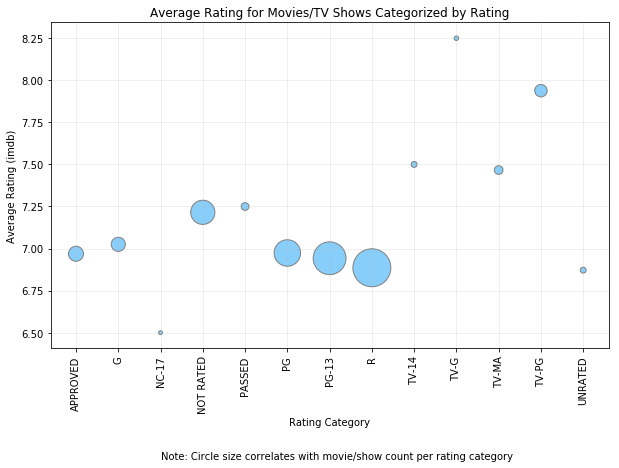

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(final_df.index, final_df['Average Rating'], final_df['Count']*5, color='lightskyblue', edgecolor='grey')
plt.xticks(rotation=90)
plt.title('Average Rating for Movies/TV Shows Categorized by Rating')
plt.xlabel('Rating Category')
plt.ylabel('Average Rating (imdb)')
plt.grid(alpha=0.25)
plt.text(2,5.75,'Note: Circle size correlates with movie/show count per rating category')
plt.savefig("images/rated_scatter.png", bbox_inches='tight')

In [36]:
both_ratings = rated.groupby('Rated').mean()
both_ratings['Count'] = count
both_ratings = both_ratings.rename(columns={'imdbRating':'Movie Rating'})
both_ratings

,Book Rating,Movie Rating,Count
Rated,,,
APPROVED,7.792,6.969,45
G,8.093,7.025,40
NC-17,6.960,6.500,3
NOT RATED,7.844,7.215,117
PASSED,7.845,7.250,12
PG,8.058,6.974,140
PG-13,7.851,6.942,215
R,7.822,6.886,288
TV-14,7.806,7.500,7


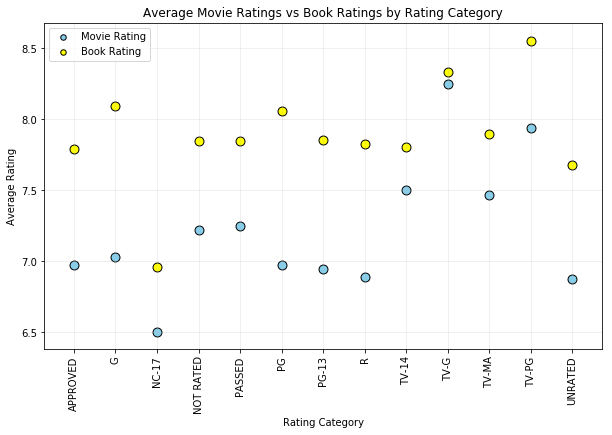

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(both_ratings.index, both_ratings['Movie Rating'], s=80, color='skyblue', edgecolor='black')

plt.scatter(both_ratings.index, both_ratings['Book Rating'], s=80, color='yellow', edgecolor='black')

plt.xticks(rotation=90)
plt.title('Average Movie Ratings vs Book Ratings by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Rating')
plt.grid(alpha=0.25)
# plt.text(2,5.75,'Note: Circle size correlates with movie/show count per rating category')
lgnd = plt.legend(loc='best')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.savefig("images/rated_scatter_both_ratings.png", bbox_inches='tight')

## Analysis by Movie Genre

In [39]:
file = "resources/new.csv"
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Title,imdbRating,Book Rating,Genre
0,0,Harry Potter and the Sorcerer's Stone,7.600,8.880,"Adventure, Family, Fantasy"
1,1,The Karamazov Brothers,7.800,8.620,Drama
2,2,2001: A Space Odyssey,8.300,7.460,"Adventure, Sci-Fi"
3,3,In Cold Blood,8.000,8.100,"Biography, Crime, Drama"
4,4,Treasure Island,7.000,7.640,"Adventure, Family"


In [40]:
df = df[['Title', 'Book Rating', 'imdbRating', 'Genre']]
df['imdbRating'] = df['imdbRating'].fillna(0)
df.count()

Title          1196
Book Rating    1196
imdbRating     1196
Genre          1175
dtype: int64

In [41]:
dict = {}
for index, row in df.iterrows():
    try:
#     if row['Genre'] != 'nan':
        
        x = row['Genre'].split(', ')
        for i in x:
            if i in dict:
                dict[i] += 1
            else:
                dict[i] = 1
#     else:
#         print('false')
#     print(row['Genre'])
    except AttributeError:
        continue
print(dict)

{'Adventure': 223, 'Family': 119, 'Fantasy': 108, 'Drama': 867, 'Sci-Fi': 95, 'Biography': 55, 'Crime': 87, 'Romance': 318, 'Short': 66, 'Horror': 100, 'Action': 74, 'Animation': 65, 'Comedy': 147, 'History': 71, 'Mystery': 109, 'Thriller': 100, 'Documentary': 30, 'Adult': 3, 'Music': 17, 'War': 35, 'Musical': 4, 'Talk-Show': 2, 'Film-Noir': 3, 'Western': 1}


In [42]:
sorted(dict.values())

[1,
 2,
 3,
 3,
 4,
 17,
 30,
 35,
 55,
 65,
 66,
 71,
 74,
 87,
 95,
 100,
 100,
 108,
 109,
 119,
 147,
 223,
 318,
 867]

In [43]:
sorted(dict, key=dict.__getitem__)

['Western',
 'Talk-Show',
 'Adult',
 'Film-Noir',
 'Musical',
 'Music',
 'Documentary',
 'War',
 'Biography',
 'Animation',
 'Short',
 'History',
 'Action',
 'Crime',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Fantasy',
 'Mystery',
 'Family',
 'Comedy',
 'Adventure',
 'Romance',
 'Drama']

In [44]:
genre = ['Horror',
 'Thriller',
 'Fantasy',
 'Mystery',
 'Family',
 'Comedy',
 'Adventure',
 'Romance',
 'Drama']


avg_book = []
avg_imdb = []
for g in genre:

    rating = 0
    rating_imdb = 0
    genre_rating = []
    genre_rating_imdb = []
    for index, row in df.iterrows():
        try:
            if row['Genre'].find(g) != -1:
#                 print(df.iloc[[index]])
#                 print(row['Book Rating'])
#                 rating = rating+float(row['Book Rating'])
#                 print(rating)
                rating = row['Book Rating']
                genre_rating.append(rating)
                rating_imdb = row['imdbRating']
                genre_rating_imdb.append(rating_imdb)
            
        except AttributeError:
            continue
#     genre_rating.append(rating)
#     print(genre_rating)
    avg = sum(genre_rating)/dict[g]
    avg_book.append(avg)
    avg = sum(genre_rating_imdb)/dict[g]
    avg_imdb.append(avg)

In [45]:
avg_book

[7.950000000000002,
 7.929800000000005,
 8.001666666666669,
 8.010642201834868,
 8.079663865546223,
 7.823401360544217,
 7.881524663677133,
 7.925471698113203,
 7.93801614763552]

In [46]:
avg_imdb

[6.284999999999997,
 6.462000000000001,
 6.860185185185189,
 6.5348623853211025,
 6.812605042016803,
 6.564625850340134,
 6.663228699551566,
 7.038364779874209,
 6.907958477508646]

In [47]:
avg_rating_df = pd.DataFrame({'Genre': genre, 'Average book rating': avg_book, 'Average IMDB rating': avg_imdb})
avg_rating_df = avg_rating_df.set_index('Genre')
avg_rating_df

,Average book rating,Average IMDB rating
Genre,,
Horror,7.950,6.285
Thriller,7.930,6.462
Fantasy,8.002,6.860
Mystery,8.011,6.535
Family,8.080,6.813
Comedy,7.823,6.565
Adventure,7.882,6.663
Romance,7.925,7.038
Drama,7.938,6.908


In [48]:
avg_rating_df['Average book rating']-avg_rating_df['Average IMDB rating']

Genre
Horror      1.665
Thriller    1.468
Fantasy     1.141
Mystery     1.476
Family      1.267
Comedy      1.259
Adventure   1.218
Romance     0.887
Drama       1.030
dtype: float64

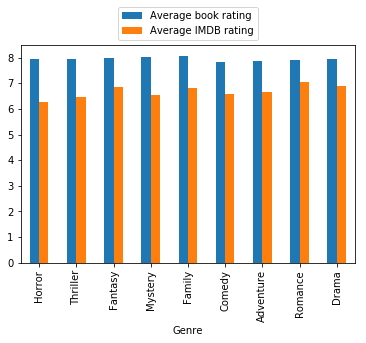

In [49]:
avg_rating_df.plot(kind='bar')
plt.legend(bbox_to_anchor=(0.5,1.1), loc="center")
plt.savefig('Avg Rating by Genre.jpg')

## Average Movie Rating from 3 Sources (iMDB, Rotten Tomatoes, Metascore)

In [55]:
df = pd.DataFrame(json_list)
df['Book Rating'] = book_rating
df = df.drop(['Country','DVD', 'Director', 'Poster', 'Production', 
              'Error',"Plot","Released","Website","Response","Runtime","totalSeasons"], axis=1)
df = df.dropna(thresh=4)
df = df.reset_index()
df.drop(['index'], axis=1)
df.dtypes

index            int64
Actors          object
Awards          object
BoxOffice       object
Genre           object
Language        object
Metascore       object
Rated           object
Ratings         object
Title           object
Type            object
Writer          object
Year            object
imdbID          object
imdbRating      object
imdbVotes       object
Book Rating    float64
dtype: object

In [56]:
for index, row in df.iterrows():
    rate_list = row["Ratings"]
    for rating in rate_list:
        if rating["Source"] == "Rotten Tomatoes":
            df.loc[index, "Rotten Tomatoes"] = int(rating["Value"].replace("%",""))/10.0

In [57]:
df["Metascore"] = pd.to_numeric(df["Metascore"], errors="coerce")/10

In [58]:
df["imdbRating"] = pd.to_numeric(df["imdbRating"], errors="coerce")
df["Rotten Tomatoes"] = pd.to_numeric(df["Rotten Tomatoes"], errors="ignore")

In [59]:
df["Average Movie Rating"] = df[["imdbRating", "Rotten Tomatoes","Metascore"]].mean(axis=1)

In [60]:
df.dtypes

index                     int64
Actors                   object
Awards                   object
BoxOffice                object
Genre                    object
Language                 object
Metascore               float64
Rated                    object
Ratings                  object
Title                    object
Type                     object
Writer                   object
Year                     object
imdbID                   object
imdbRating              float64
imdbVotes                object
Book Rating             float64
Rotten Tomatoes         float64
Average Movie Rating    float64
dtype: object

## Analysis by Awards Won by Movies

In [61]:
df["Awards"].head()

0    Nominated for 3 Oscars. Another 17 wins & 62 n...
1                              4 wins & 8 nominations.
2       Won 1 Oscar. Another 13 wins & 10 nominations.
3    Nominated for 4 Oscars. Another 4 wins & 5 nom...
4                                        1 nomination.
Name: Awards, dtype: object

In [62]:
df["Awards Binary"] = ""

for index, row in df.iterrows():
    if ("Won" in row["Awards"]) or ("win" in row["Awards"]):
        df.loc[index, "Awards Binary"] = "1"
    else:
        df.loc[index, "Awards Binary"] = "0"

In [63]:
df["Awards Binary"].head()

0    1
1    1
2    1
3    1
4    0
Name: Awards Binary, dtype: object

In [64]:
comparison_df = df[['Title','Book Rating','imdbRating','Rotten Tomatoes',
                    'Metascore','Average Movie Rating', 'Awards Binary']]

In [65]:
comparison_df['Book Rating'] = comparison_df['Book Rating']*2

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
#get rid of data without imdb reviews 
comparison_df = comparison_df.replace('N/A', np.nan)
comparison_df = comparison_df.dropna(how='any')
comparison_df = comparison_df.reset_index()
comparison_df['imdbRating'] = comparison_df['imdbRating'].astype(float)

In [67]:
# comparison_df = comparison_df[['Title', 'Book Rating','Average Movie Rating']]
grouped_df = comparison_df.groupby('Title').mean()

best_books = grouped_df.sort_values('Book Rating', ascending=False)
best_books.head()

,index,Book Rating,imdbRating,Rotten Tomatoes,Metascore,Average Movie Rating
Title,,,,,,
Harry Potter and the Sorcerer's Stone,0.000,8.880,7.600,8.000,6.400,7.333
The Green Mile,800.000,8.840,8.500,8.000,6.100,7.533
The Godfather,1171.571,8.720,9.200,9.800,10.000,9.667
The Book Thief,1109.500,8.720,7.600,4.600,5.300,5.833
Schindler's List,715.000,8.680,8.900,9.700,9.300,9.300


In [68]:
best_movies = grouped_df.sort_values('Average Movie Rating', ascending=False)
best_movies.head()

,index,Book Rating,imdbRating,Rotten Tomatoes,Metascore,Average Movie Rating
Title,,,,,,
The Godfather,1171.571,8.720,9.200,9.800,10.000,9.667
Schindler's List,715.000,8.680,8.900,9.700,9.300,9.300
The Grapes of Wrath,453.000,7.860,8.100,10.000,9.500,9.200
A Streetcar Named Desire,876.500,7.940,8.000,9.800,9.600,9.133
Gone with the Wind,1049.000,8.560,8.200,9.200,9.700,9.033


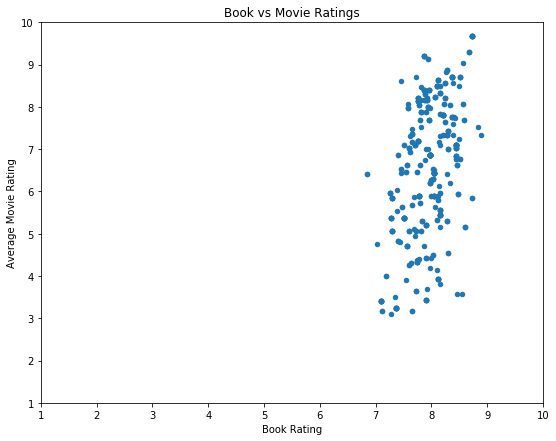

In [69]:
comparison_df.plot("Book Rating","Average Movie Rating",kind="scatter", figsize=[9,7], 
                   xlim=[1, 10], ylim=[1,10], title="Book vs Movie Ratings")
plt.savefig("book_vs_movie_ratings.png")

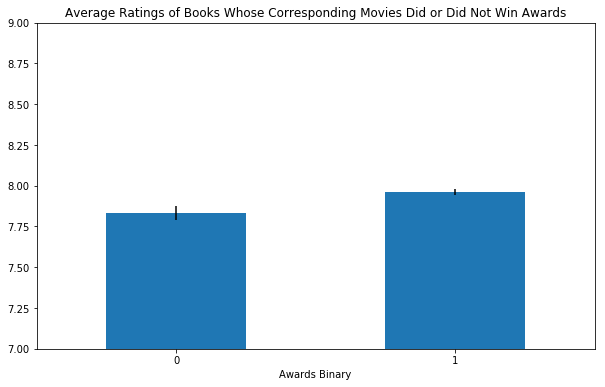

In [70]:
awards_df = comparison_df[["Title","Book Rating","Awards Binary"]]
grouped_awards = awards_df.groupby("Awards Binary").mean()
grouped_awards_sem = awards_df.groupby("Awards Binary").sem()

grouped_awards.plot(figsize=[10,6],kind="bar",yerr=grouped_awards_sem, rot=0, ylim=[7,9],legend=False,
                    title="Average Ratings of Books Whose Corresponding Movies Did or Did Not Win Awards")
plt.savefig("book_awards_ratings.png")